In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import math

In [2]:
# Load the Dataset
data = pd.read_csv("framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# impute missing values
# education - use mode as education is categorical
data['education'].fillna(data['education'].mode()[0])
# cigsPerDay - use median as this is numerical and likely skewed
data['cigsPerDay'].fillna(data['cigsPerDay'].median())
# BPMeds - use 0 as 0 means no medications
data['BPMeds'].fillna(0) #assuming 0 means not on meds
# below fields are continous and can have outliers so use median
# totChol  
data['totChol'].fillna(data['totChol'].median())
# BMI
data['BMI'].fillna(data['BMI'].median())
# heartRate
data['heartRate'].fillna(data['heartRate'].median())
# glucose
data['glucose'].fillna(data['glucose'].median())

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4233     86.0
4234     68.0
4235     86.0
4236     78.0
4237    107.0
Name: glucose, Length: 4238, dtype: float64

In [7]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
#  split features and targets
X = data.drop('TenYearCHD', axis = 1)
y = data['TenYearCHD']

In [9]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
print("Class Balance: \n", y.value_counts())

Shape of X:  (4238, 15)
Shape of y:  (4238,)
Class Balance: 
 TenYearCHD
0    3594
1     644
Name: count, dtype: int64


In [10]:
# split data into train test samples
from sklearn.model_selection import train_test_split

# using stratify=y for preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 3390
Testing samples: 848


In [11]:
scaler = StandardScaler()

# Fit only on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
# predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training set evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Test set evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.8575221238938053

Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2875
           1       0.75      0.09      0.17       515

    accuracy                           0.86      3390
   macro avg       0.80      0.54      0.54      3390
weighted avg       0.84      0.86      0.81      3390

Training Confusion Matrix:
 [[2859   16]
 [ 467   48]]

Test Accuracy: 0.847877358490566

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.50      0.07      0.12       129

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.80      0.85      0.80       848

Test Confusion Matrix:
 [[710   9]
 [120   9]]


In [15]:
# train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
# predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [17]:
# Training set evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Test set evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.68023598820059

Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78      2875
           1       0.28      0.70      0.40       515

    accuracy                           0.68      3390
   macro avg       0.60      0.69      0.59      3390
weighted avg       0.83      0.68      0.72      3390

Training Confusion Matrix:
 [[1948  927]
 [ 157  358]]

Test Accuracy: 0.6709905660377359

Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       719
           1       0.25      0.58      0.35       129

    accuracy                           0.67       848
   macro avg       0.58      0.63      0.56       848
weighted avg       0.80      0.67      0.71       848

Test Confusion Matrix:
 [[494 225]
 [ 54  75]]


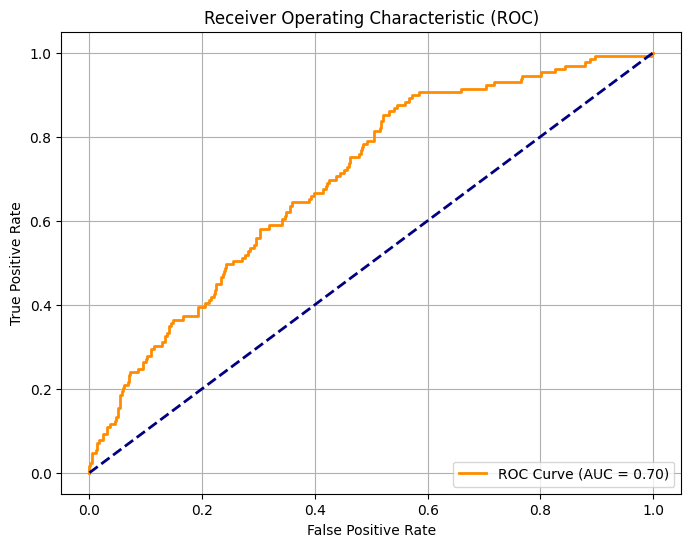

In [18]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for class 1
y_test_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


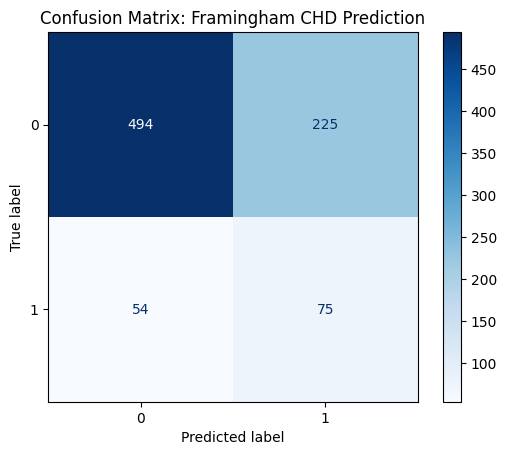

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Framingham CHD Prediction")
plt.grid(False)
plt.show()
